In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
###Questions asked:
### 1. Are left side linemen better than right side linemen?
### 2. What attributes are most important for each position?
### 3. What school produces the most players?
### 4. What school produces the most players for each position?
### 5. What attributes have the highest correlations with overall rating?
### 6. Which positions are stronger or faster than others?


In [2]:
mcfd = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\nfldf1.csv')

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (3,4,5,59,62,64,65,116,117,163,166,167,177,178,212,213,222,223,239,240,256,257,274,275,290,291,306,307,323,324,339,340,355,356,372,374,377,401,403,406,430,432,435,459,461,484,486,534,536,550,552,583,585,603,605,623,625) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mcfdcols = list(mcfd.columns.values)

In [4]:
print(mcfdcols)

['Unnamed: 0', 'Index2', 'Index1_x', 'Name', 'Team_x', 'Position_x', 'Height_x', 'Weight_x', 'Age_x_x', 'Overall Rating_x', 'Speed_x', 'Acceleration_x', 'Strength_x', 'Agility_x', 'Awareness_x', 'Catching_x', 'Carrying_x', 'Throw Power_x', 'Throw Accuracy_x', 'Kick Power_x', 'Kick Accuracy_x', 'Run Block_x', 'Pass Block_x', 'Tackle_x', 'Jumping_x', 'Kick Return_x', 'Injury_x', 'Stamina_x', 'Toughness_x', 'Trucking_x', 'Elusiveness_x', 'Ball Carrier Vision_x', 'Stiff Arm_x', 'Spin Move_x', 'Juke Move_x', 'Impact Blocking_x', 'Run Block Strength_x', 'Run Block Footwork_x', 'Pass Block Strength_x', 'Pass Block Footwork_x', 'Power Moves_x', 'Finesse Moves_x', 'Block Shedding_x', 'Pursuit_x', 'Play Recognition_x', 'Man Coverage_x', 'Zone Coverage_x', 'Spectacular Catch_x', 'Catch In Traffic_x', 'Route Running_x', 'Hit Power_x', 'Press_x', 'Release_x', 'Throw Accuracy Short_x', 'Throw Accuracy Mid_x', 'Throw Accuracy Deep_x', 'Play Action_x', 'Throw on the Run_x', 'Years Pro', 'College', 'To

In [6]:
## Overall Stats

In [6]:
mcfd.describe()

,Unnamed: 0,Index2,Index1_x,Height_x,Weight_x,Age_x_x,Overall Rating_x,Speed_x,Acceleration_x,Strength_x,...,PD,FF,Fmb,FR,Yds.1_y,TD.1_y,Sk_y,Tkl,Ast,Sfty
count,6657.000000,3583.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,...,437.000000,375.000000,375.000000,375.000000,375.000000,375.000000,319.000000,599.000000,599.000000,3.0
mean,3328.000000,1764.391292,1167.359496,74.039854,245.633591,25.893859,72.090281,79.629118,85.326962,72.437983,...,4.711670,1.122667,0.546667,0.885333,2.936000,0.146667,3.565831,28.081803,11.360601,1.0
std,1921.854703,1024.075281,678.142541,2.643759,46.156184,3.152440,8.978502,10.102803,6.123529,12.465172,...,4.393404,1.324751,1.954655,1.029082,10.926647,0.361715,3.108933,21.501458,9.482435,0.0
min,0.000000,0.000000,0.000000,66.000000,160.000000,20.000000,40.000000,50.000000,58.000000,20.000000,...,1.000000,0.000000,0.000000,0.000000,-52.000000,0.000000,0.500000,0.000000,0.000000,1.0
25%,1664.000000,859.500000,584.500000,72.000000,205.000000,24.000000,66.000000,72.000000,82.000000,65.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,5.000000,1.0
50%,3328.000000,1769.000000,1152.000000,74.000000,236.000000,25.000000,71.000000,82.000000,87.000000,73.000000,...,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,22.000000,10.000000,1.0
75%,4992.000000,2648.500000,1763.000000,76.000000,290.000000,28.000000,78.000000,88.000000,90.000000,82.000000,...,7.000000,2.000000,0.000000,1.000000,0.000000,0.000000,6.000000,39.500000,15.000000,1.0
max,6656.000000,3541.000000,2352.000000,82.000000,361.000000,44.000000,99.000000,98.000000,96.000000,98.000000,...,26.000000,5.000000,15.000000,7.000000,71.000000,2.000000,17.000000,97.000000,60.000000,1.0


mcfdcombine = mcfd[[['Overall Rating_x','Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', 'Shuttle', '40yd']]

In [16]:
mcfdcombine = mcfd[['Overall Rating_x','Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', 'Shuttle', '40yd', 'Height']]
mcfdcombine1 = mcfdcombine.describe()
mcfdcombine.describe()


,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,Shuttle,40yd
count,2459.000000,2072.000000,1670.000000,1531.000000,1650.000000,1408.000000,2005.000000
mean,72.090281,243.376448,32.600599,20.365121,115.219394,4.397884,4.782479
std,8.978502,45.853905,4.267431,6.686778,9.304452,0.266196,0.304463
min,40.000000,156.000000,17.500000,3.000000,84.000000,3.810000,4.220000
25%,66.000000,205.750000,30.000000,16.000000,109.000000,4.200000,4.540000
50%,71.000000,232.000000,33.000000,20.000000,117.000000,4.340000,4.700000
75%,78.000000,285.000000,35.500000,25.000000,122.000000,4.560000,4.980000
max,99.000000,369.000000,45.000000,44.000000,147.000000,5.380000,5.840000


In [8]:
##Which Colleges produce the most NFL players?

In [12]:
mcfdcount = mcfd.groupby('College').count()

In [13]:
print(mcfdcount.head())

              Unnamed: 0  Index2  Index1_x  Name  Team_x  Position_x  \
College                                                                
Abilene Chr.           2       2         2     2       2           2   
Air Force              1       1         1     1       1           1   
Akron                  4       4         4     4       4           4   
Alabama               51      51        51    51      51          51   
Alabama AM             1       1         1     1       1           1   

              Height_x  Weight_x  Age_x_x  Overall Rating_x  ...   PD  FF  \
College                                                      ...            
Abilene Chr.         2         2        2                 2  ...    0   0   
Air Force            1         1        1                 1  ...    0   0   
Akron                4         4        4                 4  ...    0   0   
Alabama             51        51       51                51  ...   10   9   
Alabama AM           1         1 

In [16]:
sorted_mcfd = mcfdcount.sort_values(by='Index2', ascending=False)

In [17]:
top_25 = sorted_mcfd['Index2'].head(25)

In [18]:
print(top_25)

College
LSU                56
Florida            51
Alabama            51
Ohio State         47
Florida State      46
Miami              46
Clemson            43
USC                42
Georgia            41
Texas AM           40
California         40
Mississippi St.    38
Auburn             37
Oregon             36
Tennessee          35
Oklahoma           35
UCLA               34
Notre Dame         33
Penn State         32
Wisconsin          32
Michigan           31
Utah               30
Stanford           30
Michigan St.       30
Louisville         29
Name: Index2, dtype: int64


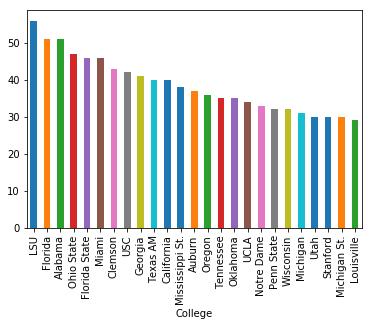

In [20]:
top_25.plot.bar()

In [22]:
top_25.to_csv('C:\\Users\\tilleymusprime\\Desktop\\top25.csv')

In [ ]:
##It looks like LSU produces the most college players

In [ ]:
##College Stats

In [52]:
mcfd[['Ht', 'Wt', 'Shuttle', 'Vertical', '3Cone', '40yd']].mean()

Wt          243.376448
Shuttle       4.397884
Vertical     32.600599
3Cone         7.248442
dtype: float64

In [47]:
#positiongroup stats

In [ ]:
#Qb stats

In [79]:
qb = mcfd[mcfd['Position_x'] == 'QB']

In [80]:
qb.shape

(109, 642)

In [55]:
mcfd.shape

(6657, 643)

In [81]:
print(qb.head())

     Unnamed: 0  Index2  Index1_x               Name Team_x Position_x  \
23           23    23.0      23.0        Brian Hoyer  49ers         QB   
29           29    29.0      29.0       Matt Barkley  49ers         QB   
30           30    30.0      30.0      C.J. Beathard  49ers         QB   
102         102    96.0      95.0  Mitchell Trubisky  Bears         QB   
112         112   106.0     105.0       Mike Glennon  Bears         QB   

     Height_x  Weight_x  Age_x_x  Overall Rating_x  ...   PD   FF  Fmb   FR  \
23       74.0     215.0     31.0              75.0  ...  NaN  0.0  3.0  1.0   
29       74.0     227.0     26.0              72.0  ...  NaN  NaN  NaN  NaN   
30       74.0     219.0     23.0              72.0  ...  NaN  NaN  NaN  NaN   
102      75.0     220.0     23.0              77.0  ...  NaN  NaN  NaN  NaN   
112      78.0     225.0     27.0              74.0  ...  NaN  NaN  NaN  NaN   

     Yds.1_y  TD.1_y  Sk_y  Tkl  Ast  Sfty  
23      -3.0     0.0   NaN  NaN  Na

In [82]:
qbcount = qb.groupby('College').count()

In [83]:
sorted_qbcount = qbcount.sort_values(by='Index2', ascending=False)

In [84]:
top10qb = sorted_qbcount.head(10)

In [421]:
print(top10qb['Index2'])

College
USC               5
Michigan St.      4
Wisconsin         3
N.C. State        3
Michigan          3
California        3
Tennessee         3
Oregon State      3
North Carolina    2
Pittsburgh        2
Name: Index2, dtype: int64


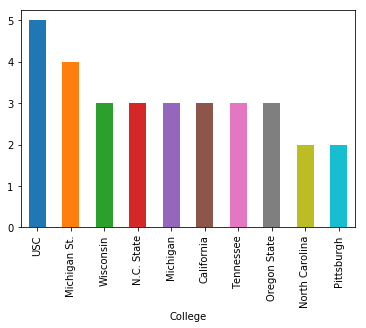

In [426]:
top10qb['Index2'].plot.bar()

In [ ]:
### It looks like USC produces the most QB's but are they really better at producing QB's or is it just random chance?

In [114]:
qbmeans = qb[['Ht', 'Wt', '3Cone', '40yd', 'Vertical', 'Shuttle', 'Bench', 'Broad Jump']].mean()

In [404]:
print(qbmeans, means, (qbmeans - means))

Wt            223.071429
3Cone           7.113333
40yd            4.811132
Vertical       31.397959
Shuttle         4.308864
Bench          16.000000
Broad Jump    112.000000
dtype: float64 Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64 Wt           -20.305019
3Cone         -0.135109
40yd           0.028653
Vertical      -1.202640
Shuttle       -0.089020
Bench         -4.365121
Broad Jump    -3.219394
dtype: float64


In [ ]:
### QB's have faster than average 3Cone, and shuttle but below average performance in the 40, vertical ability(jumping), 
### bench press and broad jump.  It doesn't appear that the raw physical attributes are the most important for this position

In [115]:
means = mcfd[['Ht', 'Wt', '3Cone', '40yd', 'Vertical', 'Shuttle', 'Bench', 'Broad Jump']].mean()

In [116]:
print(means)

Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64


In [94]:
print([qbmeans, means, qbmeans - means])

[Wt            223.071429
3Cone           7.113333
40yd            4.811132
Vertical       31.397959
Shuttle         4.308864
Bench          16.000000
Broad Jump    112.000000
dtype: float64, Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64, Wt           -20.305019
3Cone         -0.135109
40yd           0.028653
Vertical      -1.202640
Shuttle       -0.089020
Bench         -4.365121
Broad Jump    -3.219394
dtype: float64]


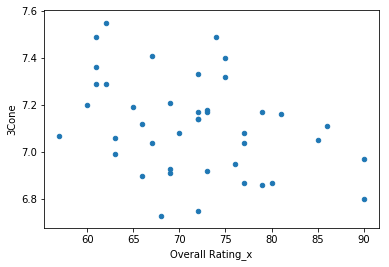

In [95]:
qbcone = qb.plot(x = 'Overall Rating_x', y = '3Cone',  kind = 'scatter')

In [117]:
qbcorr = qb[['Overall Rating_x','Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', 'Shuttle', '40yd']].corr()

In [118]:
qbcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,Shuttle,40yd
Overall Rating_x,1.000000,0.080931,0.125315,NaN,0.241625,-0.309440,-0.304423
Wt,0.080931,1.000000,0.219339,NaN,0.220737,-0.143536,0.248185
Vertical,0.125315,0.219339,1.000000,NaN,0.735375,-0.574711,-0.561267
Bench,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad Jump,0.241625,0.220737,0.735375,NaN,1.000000,-0.556001,-0.644821
Shuttle,-0.309440,-0.143536,-0.574711,NaN,-0.556001,1.000000,0.463099
40yd,-0.304423,0.248185,-0.561267,NaN,-0.644821,0.463099,1.000000


In [ ]:
### The shuttle and the 40 yd dash seem to be the most important characteristics

In [7]:
plt.show(qbcone.axhline(y=qbmeans['3Cone'], color='r'))

NameError: name 'qbcone' is not defined

In [105]:
##CornerBack stats

In [77]:
cb = mcfd[mcfd['Position_x'] == 'CB'] 

In [79]:
cb_college = cb.groupby('College').count()
cb_college_sorted = cb_college.sort_values(by='Unnamed: 0', ascending=False)
cbtop10 = cb_college_sorted.head(10)
print(cbtop10['Unnamed: 0'])

College
Texas AM         10
UCF               7
LSU               7
Florida State     7
Florida           7
Clemson           6
Ohio State        5
Auburn            5
Miami             5
USC               5
Name: Unnamed: 0, dtype: int64


In [107]:
cbmeans = cb[['Ht', 'Wt', '3Cone', '40yd', 'Vertical', 'Shuttle', 'Bench', 'Broad Jump']].mean()

In [109]:
print(cb.head())

    Unnamed: 0  Index2  Index1_x                 Name Team_x Position_x  \
18          18    18.0      18.0     Rashard Robinson  49ers         CB   
26          26    26.0      26.0      K'Waun Williams  49ers         CB   
41          41    41.0      41.0         Keith Reaser  49ers         CB   
42          42    42.0      42.0  Ahkello Witherspoon  49ers         CB   
45          45    45.0      45.0           Will Davis  49ers         CB   

    Height_x  Weight_x  Age_x_x  Overall Rating_x  ...    PD   FF  Fmb   FR  \
18      73.0     190.0     22.0              76.0  ...   NaN  NaN  NaN  NaN   
26      69.0     183.0     26.0              74.0  ...   5.0  2.0  0.0  1.0   
41      72.0     190.0     26.0              71.0  ...   2.0  NaN  NaN  NaN   
42      75.0     190.0     22.0              71.0  ...   NaN  NaN  NaN  NaN   
45      71.0     190.0     27.0              70.0  ...   NaN  NaN  NaN  NaN   

    Yds.1_y  TD.1_y  Sk_y   Tkl   Ast  Sfty  
18      NaN     NaN   NaN   

In [111]:
print([cbmeans, means, (cbmeans - means), cbmeans-qbmeans])

[Wt            200.057971
3Cone           6.957677
40yd            4.519124
Vertical       35.384298
Shuttle         4.196238
Bench          15.776786
Broad Jump    121.815126
dtype: float64, Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64, Wt           -43.318477
3Cone         -0.290765
40yd          -0.263355
Vertical       2.783699
Shuttle       -0.201646
Bench         -4.588335
Broad Jump     6.595732
dtype: float64, Wt           -23.013458
3Cone         -0.155657
40yd          -0.292008
Vertical       3.986338
Shuttle       -0.112626
Bench         -0.223214
Broad Jump     9.815126
dtype: float64]


In [ ]:
### Cornerbacks perform above average in every category except bench.  

In [89]:
#CB Correlations

In [112]:
cb_combine = cb[['Wt', 'Ht', 'Overall Rating_x', 'Shuttle', 'Vertical', '3Cone', '40yd', 'Bench', 'Broad Jump']]

In [406]:
cb_combine.corr()

,Wt,Overall Rating_x,Shuttle,Vertical,3Cone,40yd,Bench,Broad Jump
Wt,1.000000,-0.009332,0.776740,-0.476282,0.799024,0.369976,0.758215,-0.625590
Overall Rating_x,-0.009332,1.000000,-0.232899,0.162625,-0.088156,-0.081761,-0.028766,0.135767
Shuttle,0.776740,-0.232899,1.000000,-0.544104,0.838249,0.347999,0.503227,-0.633516
Vertical,-0.476282,0.162625,-0.544104,1.000000,-0.494801,-0.355292,-0.362876,0.759400
3Cone,0.799024,-0.088156,0.838249,-0.494801,1.000000,0.329497,0.636760,-0.640113
40yd,0.369976,-0.081761,0.347999,-0.355292,0.329497,1.000000,0.227023,-0.361724
Bench,0.758215,-0.028766,0.503227,-0.362876,0.636760,0.227023,1.000000,-0.470736
Broad Jump,-0.625590,0.135767,-0.633516,0.759400,-0.640113,-0.361724,-0.470736,1.000000


In [ ]:
###Speed is the key for CB's

In [ ]:
##LB Stats

In [72]:
mlb = mcfd[mcfd['Position_x'] == 'MLB']

In [129]:
print(mlb.head())

     Unnamed: 0  Index2  Index1_x             Name Team_x Position_x  \
1             1     1.0       1.0   NaVorro Bowman  49ers        MLB   
54           54    54.0      54.0      Brock Coyle  49ers        MLB   
75           75    75.0      75.0  Jerrell Freeman  Bears        MLB   
80           80    80.0      80.0  Danny Trevathan  Bears        MLB   
107         107   101.0     100.0  Nick Kwiatkoski  Bears        MLB   

     Height_x  Weight_x  Age_x_x  Overall Rating_x  ...    PD   FF  Fmb   FR  \
1        72.0     242.0     29.0              88.0  ...   3.0  0.0  0.0  1.0   
54       73.0     245.0     26.0              68.0  ...   1.0  1.0  0.0  0.0   
75       72.0     236.0     31.0              88.0  ...   NaN  NaN  NaN  NaN   
80       73.0     239.0     27.0              84.0  ...   5.0  1.0  0.0  1.0   
107      74.0     242.0     24.0              75.0  ...   NaN  NaN  NaN  NaN   

     Yds.1_y  TD.1_y  Sk_y   Tkl   Ast  Sfty  
1        1.0     0.0   1.5  80.0  47.0 

In [132]:
mlbmeans = mlb[['Ht', 'Wt', 'Overall Rating_x', 'Ht', 'Wt', 'Shuttle', 'Vertical',
                  '3Cone', '40yd', 'Bench', 'Broad Jump']].mean()

In [407]:
print(mlbmeans, means, (mlbmeans - means))

Wt                  237.293333
Overall Rating_x     71.432836
Wt                  237.293333
Shuttle               4.271020
Vertical             33.742424
3Cone                 7.094255
40yd                  4.685441
Bench                21.951613
Broad Jump          118.242424
dtype: float64 Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64 3Cone              -0.154187
40yd               -0.097038
Bench               1.586492
Broad Jump          3.023030
Overall Rating_x         NaN
Shuttle            -0.126863
Vertical            1.141825
Wt                 -6.083115
Wt                 -6.083115
dtype: float64


In [ ]:
### Above average strength above average speed

In [134]:
mlb_combine = mlb[['Overall Rating_x', 'Ht', 'Wt', 'Shuttle', 'Vertical',
                  '3Cone', '40yd', 'Bench', 'Broad Jump']]

In [408]:
mlb_combine.corr()

,Overall Rating_x,Wt,Shuttle,Vertical,3Cone,40yd,Bench,Broad Jump
Overall Rating_x,1.000000,0.098511,-0.194246,0.219081,0.085339,-0.273884,0.211111,-0.007640
Wt,0.098511,1.000000,-0.015519,-0.150969,0.013599,0.318098,0.260537,-0.327736
Shuttle,-0.194246,-0.015519,1.000000,-0.018881,0.560815,0.271447,-0.254114,-0.107891
Vertical,0.219081,-0.150969,-0.018881,1.000000,0.065344,-0.470676,0.088841,0.637744
3Cone,0.085339,0.013599,0.560815,0.065344,1.000000,0.248967,-0.085812,-0.117929
40yd,-0.273884,0.318098,0.271447,-0.470676,0.248967,1.000000,-0.127465,-0.603778
Bench,0.211111,0.260537,-0.254114,0.088841,-0.085812,-0.127465,1.000000,-0.001102
Broad Jump,-0.007640,-0.327736,-0.107891,0.637744,-0.117929,-0.603778,-0.001102,1.000000


In [ ]:
##Are these correlations significantly different from 0?

In [103]:
## best mlb by college

In [136]:
mlb_elite = mlb[mlb['Overall Rating_x'] >= 80]

In [137]:
print(mlb_elite.head())

     Unnamed: 0  Index2  Index1_x              Name   Team_x Position_x  \
1             1     1.0       1.0    NaVorro Bowman    49ers        MLB   
75           75    75.0      75.0   Jerrell Freeman    Bears        MLB   
80           80    80.0      80.0   Danny Trevathan    Bears        MLB   
169         169   161.0     158.0       Vincent Rey  Bengals        MLB   
314         314   309.0     302.0  Brandon Marshall  Broncos        MLB   

     Height_x  Weight_x  Age_x_x  Overall Rating_x  ...    PD   FF  Fmb   FR  \
1        72.0     242.0     29.0              88.0  ...   3.0  0.0  0.0  1.0   
75       72.0     236.0     31.0              88.0  ...   NaN  NaN  NaN  NaN   
80       73.0     239.0     27.0              84.0  ...   5.0  1.0  0.0  1.0   
169      72.0     250.0     29.0              80.0  ...   1.0  NaN  NaN  NaN   
314      73.0     250.0     27.0              86.0  ...   4.0  1.0  0.0  1.0   

     Yds.1_y  TD.1_y  Sk_y   Tkl   Ast  Sfty  
1        1.0     0.0 

In [138]:
mlb_elite.shape

(30, 642)

In [139]:
mlb_elite.groupby('School').count()

,Unnamed: 0,Index2,Index1_x,Name,Team_x,Position_x,Height_x,Weight_x,Age_x_x,Overall Rating_x,...,PD,FF,Fmb,FR,Yds.1_y,TD.1_y,Sk_y,Tkl,Ast,Sfty
School,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#MLB school

In [71]:
mlbcols = list(mlb.columns.values)

NameError: name 'mlb' is not defined

In [141]:
print(mlbcols)

['Unnamed: 0', 'Index2', 'Index1_x', 'Name', 'Team_x', 'Position_x', 'Height_x', 'Weight_x', 'Age_x_x', 'Overall Rating_x', 'Speed_x', 'Acceleration_x', 'Strength_x', 'Agility_x', 'Awareness_x', 'Catching_x', 'Carrying_x', 'Throw Power_x', 'Throw Accuracy_x', 'Kick Power_x', 'Kick Accuracy_x', 'Run Block_x', 'Pass Block_x', 'Tackle_x', 'Jumping_x', 'Kick Return_x', 'Injury_x', 'Stamina_x', 'Toughness_x', 'Trucking_x', 'Elusiveness_x', 'Ball Carrier Vision_x', 'Stiff Arm_x', 'Spin Move_x', 'Juke Move_x', 'Impact Blocking_x', 'Run Block Strength_x', 'Run Block Footwork_x', 'Pass Block Strength_x', 'Pass Block Footwork_x', 'Power Moves_x', 'Finesse Moves_x', 'Block Shedding_x', 'Pursuit_x', 'Play Recognition_x', 'Man Coverage_x', 'Zone Coverage_x', 'Spectacular Catch_x', 'Catch In Traffic_x', 'Route Running_x', 'Hit Power_x', 'Press_x', 'Release_x', 'Throw Accuracy Short_x', 'Throw Accuracy Mid_x', 'Throw Accuracy Deep_x', 'Play Action_x', 'Throw on the Run_x', 'Years Pro', 'College', 'To

In [73]:
mlb_college = mlb.groupby('College').count()

In [146]:
print(mlb_college)

                  Unnamed: 0  Index2  Index1_x  Name  Team_x  Position_x  \
College                                                                    
Akron                      1       1         1     1       1           1   
Alabama                    7       7         7     7       7           7   
Arizona                    1       1         1     1       1           1   
Arkansas                   2       2         2     2       2           2   
Arkansas St.               1       1         1     1       1           1   
Auburn                     2       2         2     2       2           2   
BYU                        2       2         2     2       2           2   
Baylor                     1       1         1     1       1           1   
Boise State                1       1         1     1       1           1   
Boston College             4       4         4     4       4           4   
Cal Poly SLO               1       1         1     1       1           1   
Central Mich

In [74]:
mlb_college_sorted = mlb_college.sort_values(by='Unnamed: 0', ascending=False)

In [75]:
mlb_top10 = mlb_college_sorted.head(10)

In [76]:
print(mlb_top10['Unnamed: 0'])

College
Alabama           7
LSU               6
Nevada            5
Penn State        4
Boston College    4
Louisville        3
Michigan          3
Florida State     3
Florida           3
Kentucky          3
Name: Unnamed: 0, dtype: int64


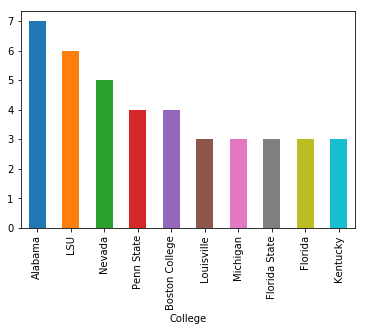

In [428]:
mlb_top10['Unnamed: 0'].plot.bar()

In [129]:
##Linemen

In [ ]:
##Centers

In [151]:
c = mcfd[mcfd['Position_x'] == 'C']

In [154]:
ccount = c.groupby('College').count()

In [155]:
print(ccount)

                  Unnamed: 0  Index2  Index1_x  Name  Team_x  Position_x  \
College                                                                    
Air Force                  1       1         1     1       1           1   
Alabama                    1       1         1     1       1           1   
Appalach. St.              1       1         1     1       1           1   
Arkansas                   2       2         2     2       2           2   
Baylor                     4       4         4     4       4           4   
Boise State                1       1         1     1       1           1   
CSU-Pueblo                 1       1         1     1       1           1   
California                 3       3         3     3       3           3   
Cincinnati                 1       1         1     1       1           1   
Colorado St.               1       1         1     1       1           1   
Cornell                    1       1         1     1       1           1   
Delaware    

In [156]:
csort = ccount.sort_values(by='Unnamed: 0', ascending=False)

In [157]:
Ctop10 = csort.head(10)

In [429]:
print(Ctop10['Unnamed: 0'])

College
Baylor            4
California        3
Missouri          3
USC               3
Florida           3
Notre Dame        2
Georgia           2
South Carolina    2
Oregon            2
Ohio State        2
Name: Unnamed: 0, dtype: int64


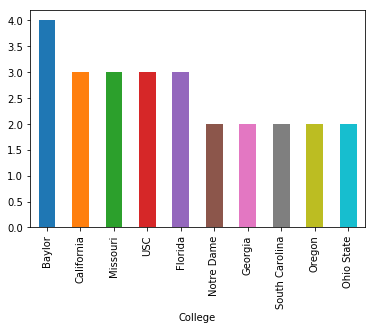

In [430]:
Ctop10['Unnamed: 0'].plot.bar()

In [ ]:
###Baylor produces the most centers but do they produce a statistically significant amount more?

In [162]:
c_combine = c[['Overall Rating_x', 'Shuttle', 'Vertical', '3Cone', '40yd', 'Ht',
              'Wt', 'Bench', 'Broad Jump']]

In [164]:
cmean = c_combine.mean()

In [166]:
print(cmean, means, (cmean- means))

Overall Rating_x     71.150000
Shuttle               4.630313
Vertical             27.823529
3Cone                 7.685806
40yd                  5.174750
Wt                  301.317073
Bench                25.486486
Broad Jump          104.030303
dtype: float64 Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64 3Cone                0.437365
40yd                 0.392271
Bench                5.121366
Broad Jump         -11.189091
Overall Rating_x          NaN
Shuttle              0.232429
Vertical            -4.777069
Wt                  57.940625
dtype: float64


In [168]:
c_combine.corr()

,Overall Rating_x,Shuttle,Vertical,3Cone,40yd,Wt,Bench,Broad Jump
Overall Rating_x,1.000000,0.144882,-0.086603,0.189403,0.197710,0.272627,0.217148,-0.062961
Shuttle,0.144882,1.000000,-0.570883,0.693694,0.187787,0.611018,0.362495,-0.611863
Vertical,-0.086603,-0.570883,1.000000,-0.602307,-0.346433,-0.800512,-0.250892,0.794198
3Cone,0.189403,0.693694,-0.602307,1.000000,0.354147,0.664114,0.539745,-0.556816
40yd,0.197710,0.187787,-0.346433,0.354147,1.000000,0.371634,0.134532,-0.442892
Wt,0.272627,0.611018,-0.800512,0.664114,0.371634,1.000000,0.500919,-0.800440
Bench,0.217148,0.362495,-0.250892,0.539745,0.134532,0.500919,1.000000,-0.251454
Broad Jump,-0.062961,-0.611863,0.794198,-0.556816,-0.442892,-0.800440,-0.251454,1.000000


In [169]:
#Left Tackle

In [210]:
lt = mcfd[mcfd['Position_x'] == 'LT']

In [213]:
ltcount = lt.groupby('College').count()

In [214]:
print(ltcount)

                    Unnamed: 0  Index2  Index1_x  Name  Team_x  Position_x  \
College                                                                      
Alabama                      2       2         2     2       2           2   
Appalach. St.                1       1         1     1       1           1   
Arkansas                     2       2         2     2       2           2   
Arkansas P.B.                1       1         1     1       1           1   
Army                         1       1         1     1       1           1   
Auburn                       2       2         2     2       2           2   
Bloomsburg                   1       1         1     1       1           1   
Boise State                  1       1         1     1       1           1   
Boston College               2       2         2     2       2           2   
Central Michigan             2       2         2     2       2           2   
Cincinnati                   2       2         2     2       2  

In [220]:
ltsort = ltcount.sort_values('Unnamed: 0', ascending=False)

In [221]:
lttop10 = ltsort.head(10)

In [222]:
print(lttop10['Unnamed: 0'])

College
USC              3
Ole Miss         3
Colorado         3
Alabama          2
Eastern Wash.    2
Virginia Tech    2
Texas AM         2
Pittsburgh       2
Oklahoma         2
Ohio State       2
Name: Unnamed: 0, dtype: int64


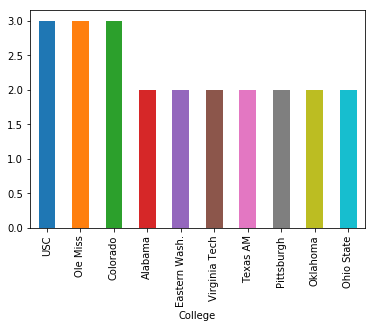

In [431]:
lttop10['Unnamed: 0'].plot.bar()

In [172]:
ltmeans = lt[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']].mean()

In [205]:
print(ltmeans, means, (ltmeans - means), (ltmeans - cmean))

Wt            315.783784
Vertical       28.296875
Bench          25.750000
Broad Jump    105.200000
3Cone           7.843333
Shuttle         4.771212
dtype: float64 Wt            243.376448
3Cone           7.248442
40yd            4.782479
Vertical       32.600599
Shuttle         4.397884
Bench          20.365121
Broad Jump    115.219394
dtype: float64 3Cone          0.594891
40yd                NaN
Bench          5.384879
Broad Jump   -10.019394
Shuttle        0.373329
Vertical      -4.303724
Wt            72.407336
dtype: float64 3Cone                0.157527
40yd                      NaN
Bench                0.263514
Broad Jump           1.169697
Overall Rating_x          NaN
Shuttle              0.140900
Vertical             0.473346
Wt                  14.466711
dtype: float64


In [208]:
ltcorr = lt[['Overall Rating_x','Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']].corr()

In [410]:
ltcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle
Overall Rating_x,1.000000,-0.170740,0.068166,0.171809,0.061955,-0.430611,-0.288036
Wt,-0.170740,1.000000,-0.535688,0.168383,-0.416034,0.547605,0.520038
Vertical,0.068166,-0.535688,1.000000,0.122125,0.725586,-0.499450,-0.501802
Bench,0.171809,0.168383,0.122125,1.000000,0.349046,-0.015486,-0.071265
Broad Jump,0.061955,-0.416034,0.725586,0.349046,1.000000,-0.585330,-0.643456
3Cone,-0.430611,0.547605,-0.499450,-0.015486,-0.585330,1.000000,0.806800
Shuttle,-0.288036,0.520038,-0.501802,-0.071265,-0.643456,0.806800,1.000000


In [ ]:
###3Cone seems to be very important as well as the shuttle.  I expected Bench to be more strongly correlated

In [ ]:
#Left Guard

In [25]:
lg = mcfd[mcfd['Position_x'] == 'LG']

In [27]:
lgcount = lg.groupby('College').count()

In [28]:
lgsort = lgcount.sort_values('Unnamed: 0', ascending = False)

In [29]:
lgtop10 = lgsort.head(10)

In [30]:
print(lgtop10['Unnamed: 0'])

College
Alabama          4
West Virginia    3
Nebraska         3
Ohio State       3
Oregon State     3
Stanford         2
Arizona St.      2
Michigan         2
Purdue           2
N.C. State       2
Name: Unnamed: 0, dtype: int64


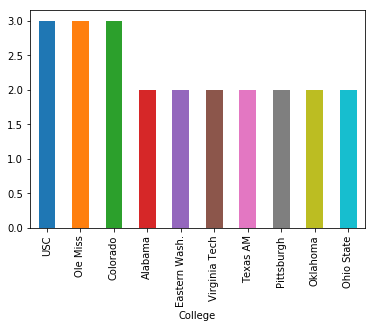

In [434]:
lgtop10['Unnamed: 0'].plot.bar()

In [237]:
lgmeans = lg[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [411]:
print(lgmeans, (lgmeans-cmean), lgmeans - ltmeans)

Wt            311.761905
Vertical       28.027027
Bench          26.875000
Broad Jump    103.842105
3Cone           7.800000
Shuttle         4.708889
40yd            5.212857
dtype: float64 3Cone                0.114194
40yd                 0.038107
Bench                1.388514
Broad Jump          -0.188198
Overall Rating_x          NaN
Shuttle              0.078576
Vertical             0.203498
Wt                  10.444832
dtype: float64 3Cone        -0.043333
40yd               NaN
Bench         1.125000
Broad Jump   -1.357895
Shuttle      -0.062323
Vertical     -0.269848
Wt           -4.021879
dtype: float64


In [ ]:
###Looks like they have stronger upper bodies and weaker lower bodies than left tackles

In [260]:
lgcorr = lg[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [412]:
lgcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,0.165036,0.039784,0.268792,0.342620,-0.262547,-0.105320,-0.267697
Wt,0.165036,1.000000,-0.222428,0.356097,-0.424218,0.228404,0.367112,0.409326
Vertical,0.039784,-0.222428,1.000000,0.175017,0.480799,0.006140,-0.071567,-0.265672
Bench,0.268792,0.356097,0.175017,1.000000,0.210338,-0.095878,0.141758,-0.211888
Broad Jump,0.342620,-0.424218,0.480799,0.210338,1.000000,-0.440049,-0.403509,-0.465412
3Cone,-0.262547,0.228404,0.006140,-0.095878,-0.440049,1.000000,0.669544,0.332791
Shuttle,-0.105320,0.367112,-0.071567,0.141758,-0.403509,0.669544,1.000000,0.376325
40yd,-0.267697,0.409326,-0.265672,-0.211888,-0.465412,0.332791,0.376325,1.000000


In [ ]:
###Strength seems more important than speed for the left guard position.  Will the same be true for right guards?

In [262]:
#Right Guard

In [31]:
rg = mcfd[mcfd['Position_x'] == 'RG']

In [32]:
rgcount = rg.groupby('College').count()

In [33]:
rgsort = rgcount.sort_values('Unnamed: 0', ascending=False)

In [34]:
rgtop10 = rgsort.head(10)

In [35]:
print(rgtop10['Unnamed: 0'])

College
Iowa            4
Texas AM        3
UCF             2
Alabama         2
San Jose St.    2
Stanford        2
LSU             2
Tennessee       2
Kent State      2
Wisconsin       2
Name: Unnamed: 0, dtype: int64


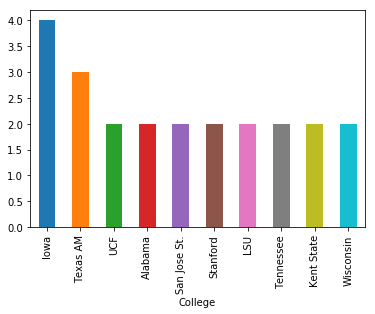

In [36]:
rgtop10['Unnamed: 0'].plot.bar()

In [270]:
rgmean = rg[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [415]:
print(rgmean - lgmeans, rgmean-ltmeans, rgmean - cmean, rgmean- means, rgmean - lgmeans)

Wt            1.514691
Vertical     -1.065489
Bench        -1.225000
Broad Jump   -2.201080
3Cone         0.008378
Shuttle       0.057868
40yd          0.020973
dtype: float64 3Cone        -0.034955
40yd               NaN
Bench        -0.100000
Broad Jump   -3.558974
Shuttle      -0.004455
Vertical     -1.335337
Wt           -2.507188
dtype: float64 3Cone                0.122572
40yd                 0.059080
Bench                0.163514
Broad Jump          -2.389277
Overall Rating_x          NaN
Shuttle              0.136444
Vertical            -0.861991
Wt                  11.959523
dtype: float64 3Cone          0.559937
40yd           0.451351
Bench          5.284879
Broad Jump   -13.578368
Shuttle        0.368873
Vertical      -5.639060
Wt            69.900148
dtype: float64 Wt            1.514691
Vertical     -1.065489
Bench        -1.225000
Broad Jump   -2.201080
3Cone         0.008378
Shuttle       0.057868
40yd          0.020973
dtype: float64


In [ ]:
###Right guards appear to be less athletic than left guards.  Why is this?  Will the same be true about Right tackles?

In [277]:
rgcorr = rg[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [416]:
rgcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,0.061028,0.343211,0.122998,0.191313,-0.301981,-0.408908,-0.105100
Wt,0.061028,1.000000,-0.397843,-0.110331,-0.354344,0.299216,0.233295,0.404739
Vertical,0.343211,-0.397843,1.000000,-0.133518,0.725615,-0.436063,-0.584152,-0.538645
Bench,0.122998,-0.110331,-0.133518,1.000000,0.040541,-0.238831,-0.085507,0.048264
Broad Jump,0.191313,-0.354344,0.725615,0.040541,1.000000,-0.272359,-0.383746,-0.574087
3Cone,-0.301981,0.299216,-0.436063,-0.238831,-0.272359,1.000000,0.725053,0.366722
Shuttle,-0.408908,0.233295,-0.584152,-0.085507,-0.383746,0.725053,1.000000,0.435992
40yd,-0.105100,0.404739,-0.538645,0.048264,-0.574087,0.366722,0.435992,1.000000


In [ ]:
### Strength is less important than speed here

In [280]:
#Right Tackle

In [281]:
rt = mcfd[mcfd['Position_x'] == 'RT']

In [283]:
rtcount = rt.groupby('College').count()

In [284]:
rtsort = rtcount.sort_values('Unnamed: 0', ascending=False)

In [285]:
rttop10 = rtsort.head(10)

In [437]:
print(rttop10['Unnamed: 0'])

College
TCU               4
Wisconsin         3
Boston College    3
Nebraska          3
Florida State     3
Florida           3
LSU               3
Virginia          2
Ole Miss          2
California        2
Name: Unnamed: 0, dtype: int64


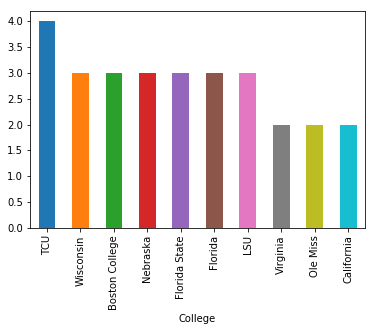

In [438]:
rttop10['Unnamed: 0'].plot.bar()

In [289]:
rtmeans = rt[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [417]:
print(rtmeans, rtmeans - ltmeans, rtmeans - rgmean)

Wt            312.000000
Vertical       27.560606
Bench          22.764706
Broad Jump    102.937500
3Cone           7.831667
Shuttle         4.781562
40yd            5.235000
dtype: float64 3Cone        -0.011667
40yd               NaN
Bench        -2.985294
Broad Jump   -2.262500
Shuttle       0.010350
Vertical     -0.736269
Wt           -3.783784
dtype: float64 Wt           -1.276596
Vertical      0.599068
Bench        -2.885294
Broad Jump    1.296474
3Cone         0.023288
Shuttle       0.014806
40yd          0.001170
dtype: float64


In [ ]:
###Right tackles appear to be less athletic than left tackles.  

In [294]:
rtcorr = rt[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [295]:
rtcorr

,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Wt,1.000000,-0.281423,-0.069638,-0.368810,0.416731,0.443883,0.516177
Vertical,-0.281423,1.000000,0.350177,0.504485,-0.602036,-0.684791,-0.573938
Bench,-0.069638,0.350177,1.000000,0.083038,-0.498732,-0.207179,-0.587403
Broad Jump,-0.368810,0.504485,0.083038,1.000000,-0.460104,-0.482397,-0.495170
3Cone,0.416731,-0.602036,-0.498732,-0.460104,1.000000,0.726346,0.610871
Shuttle,0.443883,-0.684791,-0.207179,-0.482397,0.726346,1.000000,0.693454
40yd,0.516177,-0.573938,-0.587403,-0.495170,0.610871,0.693454,1.000000


In [296]:
##Offense Skill Players

In [297]:
#Wide Receiver

In [298]:
wr = mcfd[mcfd['Position_x'] == 'WR']

In [299]:
wrcount = wr.groupby('College').count()

In [301]:
wrsort = wrcount.sort_values('Unnamed: 0', ascending= False)

In [302]:
wrtop10 = wrsort.head(10)

In [439]:
print(wrtop10['Unnamed: 0'])

College
Ohio State       9
Clemson          9
California       9
West Virginia    8
UCF              7
LSU              7
Baylor           6
Florida State    6
Georgia          6
Ole Miss         6
Name: Unnamed: 0, dtype: int64


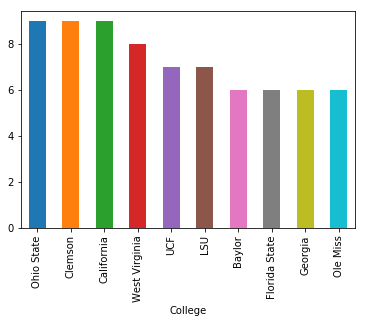

In [440]:
wrtop10['Unnamed: 0'].plot.bar()

In [306]:
wrmeans = wr[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [307]:
print(wrmeans, wrmeans - cbmeans)

Wt            202.841772
Vertical       35.192857
Bench          14.758333
Broad Jump    121.695652
3Cone           6.931923
Shuttle         4.197273
40yd            4.497059
dtype: float64 3Cone        -0.025754
40yd         -0.022065
Bench        -1.018452
Broad Jump   -0.119474
Shuttle       0.001035
Vertical     -0.191440
Wt            2.783801
dtype: float64


In [310]:
wrcorr = wr[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [313]:
wrcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,0.196816,0.055941,0.303199,-0.084201,0.114035,-0.040348,-0.063606
Wt,0.196816,1.000000,-0.073054,0.553334,-0.127739,0.321795,0.104367,0.433528
Vertical,0.055941,-0.073054,1.000000,0.087122,0.633445,-0.205819,-0.182801,-0.379747
Bench,0.303199,0.553334,0.087122,1.000000,-0.074387,0.211265,-0.185510,0.171932
Broad Jump,-0.084201,-0.127739,0.633445,-0.074387,1.000000,-0.169799,-0.013146,-0.482632
3Cone,0.114035,0.321795,-0.205819,0.211265,-0.169799,1.000000,0.554455,0.233832
Shuttle,-0.040348,0.104367,-0.182801,-0.185510,-0.013146,0.554455,1.000000,0.134508
40yd,-0.063606,0.433528,-0.379747,0.171932,-0.482632,0.233832,0.134508,1.000000


In [ ]:
#Tight End

In [312]:
te = mcfd[mcfd['Position_x'] == 'TE']

In [315]:
tecount = te.groupby('College').count()

In [316]:
tesort = tecount.sort_values('Unnamed: 0', ascending= False)

In [317]:
tetop10 = tesort.head(10)

In [441]:
print(tetop10['Unnamed: 0'])

College
Oregon          10
Arkansas St.     8
Miami            6
Notre Dame       6
Tennessee        6
Iowa             4
Arkansas         4
Louisville       4
UCLA             4
Oklahoma         4
Name: Unnamed: 0, dtype: int64


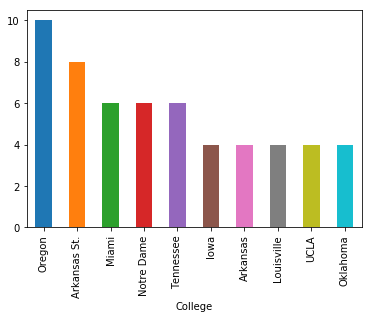

In [442]:
tetop10['Unnamed: 0'].plot.bar()

In [321]:
temeans = te[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [324]:
print(temeans, temeans - wrmeans)

Wt            250.000000
Vertical       33.771429
Bench          21.904110
Broad Jump    118.029412
3Cone           7.157167
Shuttle         4.384032
40yd            4.725488
dtype: float64 Wt            47.158228
Vertical      -1.421429
Bench          7.145776
Broad Jump    -3.666240
3Cone          0.225244
Shuttle        0.186760
40yd           0.228429
dtype: float64


In [325]:
tecorr = te[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [327]:
tecorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,0.142051,-0.149811,0.016457,-0.112182,0.077356,0.056318,-0.082552
Wt,0.142051,1.000000,-0.367338,0.572536,-0.598683,0.817829,0.789247,0.230848
Vertical,-0.149811,-0.367338,1.000000,-0.030250,0.750443,-0.457287,-0.315016,-0.478044
Bench,0.016457,0.572536,-0.030250,1.000000,-0.319348,0.562214,0.619415,0.045391
Broad Jump,-0.112182,-0.598683,0.750443,-0.319348,1.000000,-0.710118,-0.604900,-0.472589
3Cone,0.077356,0.817829,-0.457287,0.562214,-0.710118,1.000000,0.879269,0.346532
Shuttle,0.056318,0.789247,-0.315016,0.619415,-0.604900,0.879269,1.000000,0.300291
40yd,-0.082552,0.230848,-0.478044,0.045391,-0.472589,0.346532,0.300291,1.000000


In [328]:
#HB 

In [20]:
hb = mcfd[mcfd['Position_x'] == 'HB']

In [336]:
hbcount = hb.groupby('College').count()

In [337]:
hbsort = hbcount.sort_values('Unnamed: 0', ascending= False)

In [340]:
hbtop10 = hbsort.head(10)

In [443]:
print(hbtop10['Unnamed: 0'])

College
Northern Iowa     8
LSU               7
Alabama           6
Oklahoma          5
South Carolina    5
California        5
North Carolina    4
Texas             4
Oregon            4
Florida State     4
Name: Unnamed: 0, dtype: int64


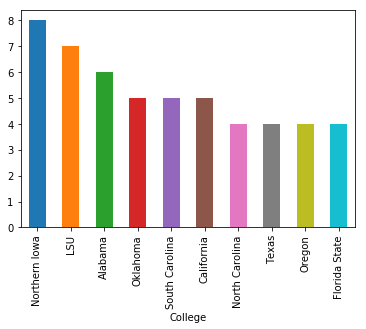

In [445]:
hbtop10['Unnamed: 0'].plot.bar()

In [342]:
hcorr = hb[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [17]:
hcorr

NameError: name 'hcorr' is not defined

In [21]:
fb = mcfd[mcfd['Position_x'] == 'FB']

In [23]:
fbcount = fb.groupby('College').count()

In [24]:
fbsort = fbcount.sort_values('Unnamed: 0', ascending= False)
fbtop10 = fbsort.head(10)
print(fbtop10['Unnamed: 0'])

College
UCLA             2
Alabama          1
Auburn           1
West Georgia     1
Washington       1
Wake Forest      1
Virginia Tech    1
Villanova        1
USC              1
Tennessee        1
Name: Unnamed: 0, dtype: int64


In [345]:
##Defense

In [346]:
#Defensive Tackle

In [37]:
dt = mcfd[mcfd['Position_x'] == 'DT']

In [38]:
dtcount = dt.groupby('College').count()

In [39]:
dtsort = dtcount.sort_values('Unnamed: 0', ascending = False)

In [40]:
dttop10 = dtsort.head(10)

In [41]:
print(dttop10['Unnamed: 0'])

College
Missouri So. State    8
Alabama               7
LSU                   6
Auburn                5
Clemson               5
Mississippi St.       4
Tennessee             4
Ohio State            4
Michigan St.          3
Florida               3
Name: Unnamed: 0, dtype: int64


In [ ]:
dttop10['Unnamed: 0'.plot.bar()

In [354]:
dtmeans = dt[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [356]:
print(dtmeans, dtmeans - lgmeans, dtmeans - cmean)

Wt            305.084337
Vertical       28.826389
Bench          27.328358
Broad Jump    105.464789
3Cone           7.649545
Shuttle         4.625909
40yd            5.097407
dtype: float64 Wt           -6.677567
Vertical      0.799362
Bench         0.453358
Broad Jump    1.622683
3Cone        -0.150455
Shuttle      -0.082980
40yd         -0.115450
dtype: float64 3Cone              -0.036261
40yd               -0.077343
Bench               1.841872
Broad Jump          1.434486
Overall Rating_x         NaN
Shuttle            -0.004403
Vertical            1.002859
Wt                  3.767264
dtype: float64


In [357]:
dtcorr = dt[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [358]:
dtcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,-0.199916,0.114611,0.192039,0.167765,-0.307974,-0.122843,-0.241289
Wt,-0.199916,1.000000,-0.297434,0.531651,-0.671828,0.795858,0.716483,0.366713
Vertical,0.114611,-0.297434,1.000000,0.086185,0.559565,-0.257811,-0.362972,-0.344833
Bench,0.192039,0.531651,0.086185,1.000000,-0.291418,0.434845,0.437495,-0.000090
Broad Jump,0.167765,-0.671828,0.559565,-0.291418,1.000000,-0.639031,-0.589722,-0.502353
3Cone,-0.307974,0.795858,-0.257811,0.434845,-0.639031,1.000000,0.795348,0.343817
Shuttle,-0.122843,0.716483,-0.362972,0.437495,-0.589722,0.795348,1.000000,0.307714
40yd,-0.241289,0.366713,-0.344833,-0.000090,-0.502353,0.343817,0.307714,1.000000


In [ ]:
##Defensive Ends

In [42]:
re = mcfd[mcfd['Position_x'] == 'RE']

In [48]:
le = mcfd[mcfd['Position_x'] == 'LE']
lecount = le.groupby('College').count()
letop10 = lecount.head(10)
print(letop10['Unnamed: 0'])

College
Alabama           2
Alabama AM        1
Appalach. St.     1
Arizona           2
Arizona St.       1
Arkansas          2
Auburn            1
Bloomsburg        1
Boise State       3
Boston College    1
Name: Unnamed: 0, dtype: int64


In [44]:
recount = re.groupby('College').count()

In [45]:
resort = recount.sort_values('Unnamed: 0', ascending=False)

In [47]:
retop10 = resort.head(10)
print(retop10['Unnamed: 0'])

College
Mississippi St.    19
Texas AM            5
Miami               4
Penn State          4
USC                 4
Georgia Tech        3
South Carolina      3
Iowa                3
Florida             3
Louisville          2
Name: Unnamed: 0, dtype: int64


In [246]:
de = pd.concat([re, le], axis = 0)

In [247]:
decount = de.groupby('College').count()

In [254]:
desort = decount.sort_values('Unnamed: 0', ascending=False)

In [255]:
detop10 = desort.head(10)

In [450]:
print(detop10['Unnamed: 0'])

College
Mississippi St.    22
Florida             7
Georgia             6
LSU                 6
Penn State          6
Michigan            5
UCLA                5
USC                 5
Texas AM            5
Ole Miss            4
Name: Unnamed: 0, dtype: int64


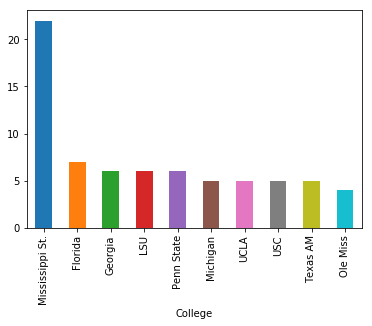

In [451]:
detop10['Unnamed: 0'].plot.bar()

In [239]:
demean = de[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [241]:
print(demean - means)

3Cone          0.078588
40yd           0.101707
Bench          3.391889
Broad Jump    -0.559017
Shuttle        0.052017
Vertical      -0.781154
Wt            33.096835
dtype: float64


In [244]:
decorr = de[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [245]:
decorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,-0.104259,-0.066690,0.084172,-0.039988,-0.311509,-0.211794,-0.036079
Wt,-0.104259,1.000000,-0.434952,0.650861,-0.594461,0.641815,0.581074,0.321108
Vertical,-0.066690,-0.434952,1.000000,0.034737,0.677309,-0.349544,-0.477752,-0.454262
Bench,0.084172,0.650861,0.034737,1.000000,-0.149653,0.378337,0.330781,-0.072189
Broad Jump,-0.039988,-0.594461,0.677309,-0.149653,1.000000,-0.513969,-0.471189,-0.533994
3Cone,-0.311509,0.641815,-0.349544,0.378337,-0.513969,1.000000,0.674273,0.379791
Shuttle,-0.211794,0.581074,-0.477752,0.330781,-0.471189,0.674273,1.000000,0.358674
40yd,-0.036079,0.321108,-0.454262,-0.072189,-0.533994,0.379791,0.358674,1.000000


In [359]:
#Right Outside Linebacker

In [49]:
rlb = mcfd[mcfd['Position_x'] == 'ROLB']

In [50]:
rlbcount = rlb.groupby('College').count()

In [51]:
rlbsort = rlbcount.sort_values('Unnamed: 0', ascending=False)

In [52]:
rlbtop10 = rlbsort.head(10)

In [53]:
print(rlbtop10['Unnamed: 0'])

College
Texas              4
Missouri           4
Wisconsin          3
California         3
Rutgers            3
Arizona St.        3
Mississippi St.    3
LSU                3
Georgia            3
Alabama            2
Name: Unnamed: 0, dtype: int64


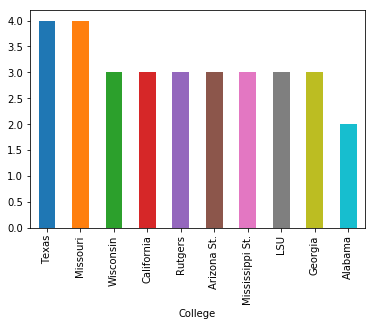

In [54]:
rlbtop10['Unnamed: 0'].plot.bar()

In [370]:
rlbmeans = rlb[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [371]:
print(rlbmeans, rlbmeans - mlbmeans)

Wt            247.584906
Vertical       33.345238
Bench          22.162162
Broad Jump    118.047619
3Cone           7.045000
Shuttle         4.320000
40yd            4.723000
dtype: float64 3Cone               -0.049255
40yd                 0.037559
Bench                0.210549
Broad Jump          -0.194805
Overall Rating_x          NaN
Shuttle              0.048980
Vertical            -0.397186
Wt                  10.291572
Wt                  10.291572
dtype: float64


In [372]:
rlbcorr = rlb[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [373]:
rlbcorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,0.064173,0.299924,0.188619,0.270693,-0.137594,-0.185903,-0.197316
Wt,0.064173,1.000000,-0.173744,0.308322,-0.105265,0.245850,0.442811,0.565254
Vertical,0.299924,-0.173744,1.000000,0.130826,0.754283,-0.131841,-0.303253,-0.390578
Bench,0.188619,0.308322,0.130826,1.000000,0.257938,-0.011547,0.162797,0.036040
Broad Jump,0.270693,-0.105265,0.754283,0.257938,1.000000,-0.139065,-0.161091,-0.575099
3Cone,-0.137594,0.245850,-0.131841,-0.011547,-0.139065,1.000000,0.715417,0.298815
Shuttle,-0.185903,0.442811,-0.303253,0.162797,-0.161091,0.715417,1.000000,0.368757
40yd,-0.197316,0.565254,-0.390578,0.036040,-0.575099,0.298815,0.368757,1.000000


In [374]:
#Left Outside Linebacker

In [55]:
llb = mcfd[mcfd['Position_x'] == 'LOLB']

In [56]:
llbcount = llb.groupby('College').count()

In [57]:
llbsort = llbcount.sort_values('Unnamed: 0', ascending=False)

In [58]:
llbtop10 = llbsort.head(10)

In [59]:
print(llbtop10['Unnamed: 0'])

College
UCLA                4
Florida State       3
Auburn              3
Georgia             3
USC                 3
Utah                3
North Dakota St.    2
Missouri            2
Minnesota           2
Miami               2
Name: Unnamed: 0, dtype: int64


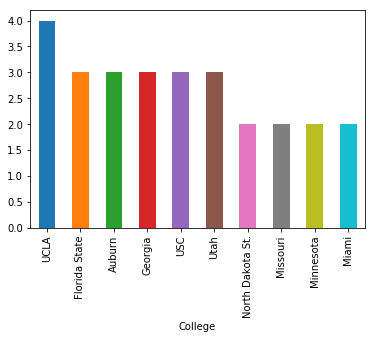

In [457]:
llbtop10['Unnamed: 0'].plot.bar()

In [382]:
fs = mcfd[mcfd['Position_x'] == 'FS']

In [383]:
fscount = fs.groupby('College').count()

In [384]:
fssort = fscount.sort_values('Unnamed: 0', ascending=False)

In [385]:
fstop10 = fssort.head(10)

In [458]:
print(fstop10['Unnamed: 0'])

College
Connecticut       4
Ohio State        4
San Jose St.      4
Stanford          3
Auburn            3
Virginia Tech     3
Boston College    3
Texas AM          3
San Diego St.     2
South Carolina    2
Name: Unnamed: 0, dtype: int64


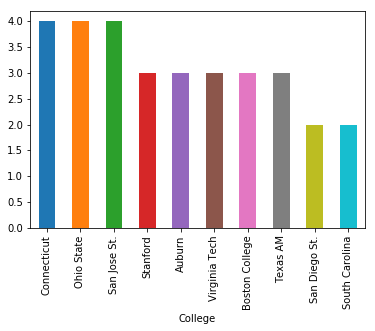

In [460]:
fstop10['Unnamed: 0'].plot.bar()

In [388]:
fsmeans = fs[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [389]:
print(fsmeans, fsmeans - cbmeans)

Wt            203.775000
Vertical       36.625000
Bench          15.939394
Broad Jump    123.656250
3Cone           6.925200
Shuttle         4.165926
40yd            4.553784
dtype: float64 3Cone        -0.032477
40yd          0.034660
Bench         0.162608
Broad Jump    1.841124
Shuttle      -0.030312
Vertical      1.240702
Wt            3.717029
dtype: float64


In [390]:
fscorr = fs[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [391]:
fscorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,-0.121567,-0.004005,-0.300172,0.034840,-0.259660,-0.066965,-0.094174
Wt,-0.121567,1.000000,0.078876,0.687507,0.259539,-0.145956,-0.111554,-0.029245
Vertical,-0.004005,0.078876,1.000000,0.249136,0.767226,-0.113461,-0.298800,-0.354286
Bench,-0.300172,0.687507,0.249136,1.000000,0.409865,-0.111008,0.016246,-0.184268
Broad Jump,0.034840,0.259539,0.767226,0.409865,1.000000,-0.255503,-0.415189,-0.474488
3Cone,-0.259660,-0.145956,-0.113461,-0.111008,-0.255503,1.000000,0.576434,0.056168
Shuttle,-0.066965,-0.111554,-0.298800,0.016246,-0.415189,0.576434,1.000000,0.218778
40yd,-0.094174,-0.029245,-0.354286,-0.184268,-0.474488,0.056168,0.218778,1.000000


In [60]:
ss = mcfd[mcfd['Position_x'] == 'SS']

In [61]:
sscount= ss.groupby('College').count()

In [62]:
sssort= sscount.sort_values('Unnamed: 0', ascending= False)

In [67]:
sstop10 = sssort.head(10)
print(sstop10['Unnamed: 0'])

College
Florida          4
Oregon           3
Georgia          3
West Virginia    3
USC              3
Ohio State       2
Notre Dame       2
N.C. State       2
Michigan         2
Miami            2
Name: Unnamed: 0, dtype: int64


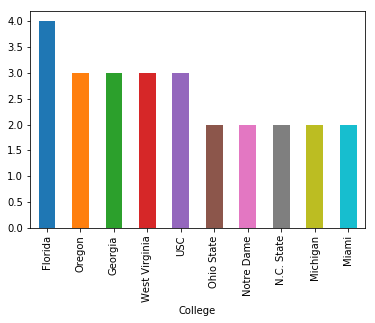

In [65]:
sstop10['Unnamed: 0'].plot.bar()

In [396]:
ssmeans = ss[['Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].mean()

In [397]:
print(ssmeans, ssmeans - fsmeans, ssmeans - cbmeans)

Wt            211.400000
Vertical       34.564516
Bench          16.937500
Broad Jump    120.343750
3Cone           6.980370
Shuttle         4.212083
40yd            4.575278
dtype: float64 Wt            7.625000
Vertical     -2.060484
Bench         0.998106
Broad Jump   -3.312500
3Cone         0.055170
Shuttle       0.046157
40yd          0.021494
dtype: float64 3Cone          0.022694
40yd           0.056154
Bench          1.160714
Broad Jump    -1.471376
Shuttle        0.015846
Vertical      -0.819781
Wt            11.342029
dtype: float64


In [401]:
sscorr = ss[['Overall Rating_x', 'Ht', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']].corr()

In [402]:
sscorr

,Overall Rating_x,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Overall Rating_x,1.000000,0.350991,0.220182,0.259669,0.067416,0.331532,0.204735,0.261590
Wt,0.350991,1.000000,-0.341123,0.224436,-0.483801,0.715455,0.820065,0.761558
Vertical,0.220182,-0.341123,1.000000,0.234992,0.749517,-0.104666,-0.286244,-0.480484
Bench,0.259669,0.224436,0.234992,1.000000,0.208174,0.209380,0.206136,-0.070748
Broad Jump,0.067416,-0.483801,0.749517,0.208174,1.000000,-0.310679,-0.434554,-0.644841
3Cone,0.331532,0.715455,-0.104666,0.209380,-0.310679,1.000000,0.901550,0.479438
Shuttle,0.204735,0.820065,-0.286244,0.206136,-0.434554,0.901550,1.000000,0.680423
40yd,0.261590,0.761558,-0.480484,-0.070748,-0.644841,0.479438,0.680423,1.000000


In [1]:
plt.scatter(m18['Speed'], m18['Position'])
plt.xlabel('Speed')
plt.ylabel('Position')
plt.title('Speed by Position')
plt.show()

NameError: name 'plt' is not defined